# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [45]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [46]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "python-разработчик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [47]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

In [48]:
data['items'][3]

{'id': '98638255',
 'premium': False,
 'name': 'Junior/Стажер Python-разработчик',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': None, 'to': 45000, 'currency': 'RUR', 'gross': True},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2024-05-08T22:07:55+0300',
 'created_at': '2024-05-08T22:07:55+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=98638255',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/98638255?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/98638255',
 'relations': [],
 'employer': {'id': '11050419',
  'name': 'Матвеев Дмитрий Александрович',
  'url': 'https://api.hh.ru/employers/11050419',
  'alternate_url': 'https://hh.ru/employer/11050419',
  'logo_urls': None,
  'vacancies_url': 'htt

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [49]:
import time

In [58]:
specialities = [
    'Уборщик',
    'Повар',
    'Курьер',
    'python-разработчик',
    'Водитель',
]

In [60]:
vacancies = []
params['per_page'] = 50
for job in specialities:
    params['text'] = job
    job_vacs = []
    for j in range(10):
        params['page'] = j
        current_vacancies = requests.get(URL, params).json()
        time.sleep(0.1)
        for vacancy in current_vacancies['items']:
            job_vacs.append(vacancy)
        
    vacancies.append(job_vacs)

In [61]:
vacancies[1][10]

{'id': '98962317',
 'premium': False,
 'name': 'ПОВАР В СЕМЬЮ',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2024-05-14T19:09:43+0300',
 'created_at': '2024-05-14T19:09:43+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=98962317',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/98962317?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/98962317',
 'relations': [],
 'employer': {'id': '2862440',
  'name': 'Центр международных Деловых проектов Интербизнеспроект',
  'url': 'https://api.hh.ru/employers/2862440',
  'alternate_url': 'https://hh.ru/employer/2862440',
  'logo_urls': None,
  'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=2862440',
  'accr

(1 балл) Посчитайте сколько всего найдено вакансий:

In [62]:
summ = 0
for i in vacancies:
    summ += len(i)
summ

2500

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [63]:
class Company:
    def __init__(self, info):
        self.name_of_company = info['employer']['name']
        self.coords_of_company = None
        if info['address'] is not None:
            self.coords_of_company = (info['address']['lat'], info['address']['lng'])
            
    def __repr__(self):
        string = f'Name of company is: {self.name_of_company}'
        string += '\n'
        string += f'Coords of company is: {self.coords_of_company}'
        return string
    def has_adress(self):
        return self.coords_of_company is not None

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [64]:
companies = []
for job in vacancies:
    for vacancy in job:
        companies.append(Company(vacancy))

In [65]:
companies[220]

Name of company is: Уварова Елена
Coords of company is: (None, None)

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [66]:
summ = 0
for cur in companies:
    summ += cur.has_adress()
summ

1599

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [67]:
import cmath
import math

In [68]:
from shapely import Polygon
from shapely import Point

In [69]:
#Координаты каждого километра МКАД в массиве
mkad_km = [
[1,37.842762,55.774558],
[2,37.842789,55.76522],
[3,37.842627,55.755723],
[4,37.841828,55.747399],
[5,37.841217,55.739103],
[6,37.840175,55.730482],
[7,37.83916,55.721939],
[8,37.837121,55.712203],
[9,37.83262,55.703048],
[10,37.829512,55.694287],
[11,37.831353,55.68529],
[12,37.834605,55.675945],
[13,37.837597,55.667752],
[14,37.839348,55.658667],
[15,37.833842,55.650053],
[16,37.824787,55.643713],
[17,37.814564,55.637347],
[18,37.802473,55.62913],
[19,37.794235,55.623758],
[20,37.781928,55.617713],
[21,37.771139,55.611755],
[22,37.758725,55.604956],
[23,37.747945,55.599677],
[24,37.734785,55.594143],
[25,37.723062,55.589234],
[26,37.709425,55.583983],
[27,37.696256,55.578834],
[28,37.683167,55.574019],
[29,37.668911,55.571999],
[30,37.647765,55.573093],
[31,37.633419,55.573928],
[32,37.616719,55.574732],
[33,37.60107,55.575816],
[34,37.586536,55.5778],
[35,37.571938,55.581271],
[36,37.555732,55.585143],
[37,37.545132,55.587509],
[38,37.526366,55.5922],
[39,37.516108,55.594728],
[40,37.502274,55.60249],
[41,37.49391,55.609685],
[42,37.484846,55.617424],
[43,37.474668,55.625801],
[44,37.469925,55.630207],
[45,37.456864,55.641041],
[46,37.448195,55.648794],
[47,37.441125,55.654675],
[48,37.434424,55.660424],
[49,37.42598,55.670701],
[50,37.418712,55.67994],
[51,37.414868,55.686873],
[52,37.407528,55.695697],
[53,37.397952,55.702805],
[54,37.388969,55.709657],
[55,37.383283,55.718273],
[56,37.378369,55.728581],
[57,37.374991,55.735201],
[58,37.370248,55.744789],
[59,37.369188,55.75435],
[60,37.369053,55.762936],
[61,37.369619,55.771444],
[62,37.369853,55.779722],
[63,37.372943,55.789542],
[64,37.379824,55.79723],
[65,37.386876,55.805796],
[66,37.390397,55.814629],
[67,37.393236,55.823606],
[68,37.395275,55.83251],
[69,37.394709,55.840376],
[70,37.393056,55.850141],
[71,37.397314,55.858801],
[72,37.405588,55.867051],
[73,37.416601,55.872703],
[74,37.429429,55.877041],
[75,37.443596,55.881091],
[76,37.459065,55.882828],
[77,37.473096,55.884625],
[78,37.48861,55.888897],
[79,37.5016,55.894232],
[80,37.513206,55.899578],
[81,37.527597,55.90526],
[82,37.543443,55.907687],
[83,37.559577,55.909388],
[84,37.575531,55.910907],
[85,37.590344,55.909257],
[86,37.604637,55.905472],
[87,37.619603,55.901637],
[88,37.635961,55.898533],
[89,37.647648,55.896973],
[90,37.667878,55.895449],
[91,37.681721,55.894868],
[92,37.698807,55.893884],
[93,37.712363,55.889094],
[94,37.723636,55.883555],
[95,37.735791,55.877501],
[96,37.741261,55.874698],
[97,37.764519,55.862464],
[98,37.765992,55.861979],
[99,37.788216,55.850257],
[100,37.788522,55.850383],
[101,37.800586,55.844167],
[102,37.822819,55.832707],
[103,37.829754,55.828789],
[104,37.837148,55.821072],
[105,37.838926,55.811599],
[106,37.840004,55.802781],
[107,37.840965,55.793991],
[108,37.841576,55.785017]
];

In [70]:
mkad_polygon = Polygon([Point(point[2], point[1]) for point in mkad_km])
mkad_convex = mkad_polygon.convex_hull

def check_if_near_mkad(vacancy: Company):
    if not vacancy.has_adress() or None in vacancy.coords_of_company:
        return False
    return mkad_convex.contains(Point(*vacancy.coords_of_company))

In [76]:
vacancies_near_mkad = [vacancy for vacancy in companies if check_if_near_mkad(vacancy)]
len(vacancies_near_mkad)

1333

In [78]:
[curr_company for curr_company in companies if curr_company.has_adress() and None not in curr_company.coords_of_company and min(curr_company.coords_of_company) < 20]

[Name of company is: Transparent Hiring
 Coords of company is: (51.230569, 6.787428)]

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

In [81]:
import geopandas
from shapely import Point

In [82]:
[curr_company for curr_company in companies if curr_company.has_adress() and None not in curr_company.coords_of_company and min(curr_company.coords_of_company) > 50]

[Name of company is: Алабуга, ОЭЗ ППТ
 Coords of company is: (55.83428, 52.046124)]

In [87]:
in_mkad_series = pd.DataFrame([vacancy.coords_of_company[::-1] for vacancy in vacancies_near_mkad], columns=['x', 'y'])

<Axes: xlabel='x', ylabel='y'>

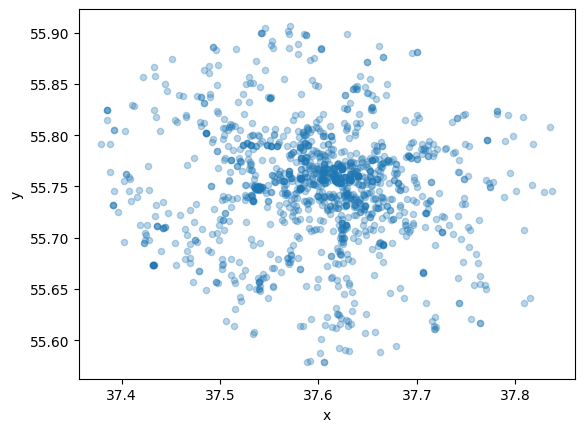

In [88]:
in_mkad_series.plot.scatter(x='x', y='y', alpha=0.3)

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [102]:
geopandas.options.io_engine = "pyogrio"
adm_moscow = geopandas.read_file("http://gis-lab.info/data/mos-adm/mo.geojson")

In [105]:
gp_in_mkad = geopandas.GeoSeries([Point(*vacancy.coords_of_company[::-1]) for vacancy in companies if vacancy.has_adress() and None not in vacancy.coords_of_company and 55 <= vacancy.coords_of_company[0] <= 56 and 37 <= vacancy.coords_of_company[1] <= 38])

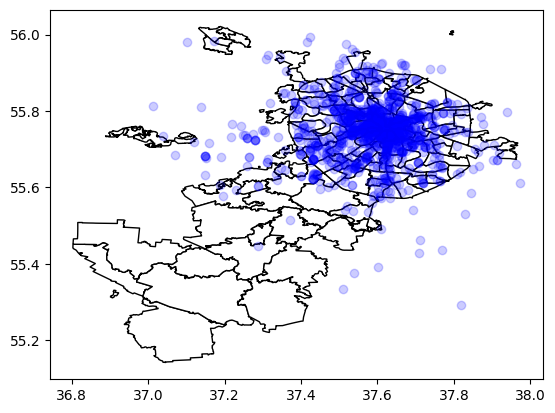

In [107]:
fig, ax = plt.subplots()
adm_moscow['geometry'].plot(ax=ax, color='white', edgecolor='black')
gp_in_mkad.plot(ax=ax, marker='o', color='blue', alpha=0.2)
plt.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

In [109]:
Итак, большинство компаний находятся ближе к центру Москвы. Как мы видим на картинке сверху, количество вакансий всё больше стягивается
к центру Москвы, так как зарплаты в центре возрастают, приближаясь к центру Москвы. Средние зарплаты в Москве у выбранных профессий 
70-80 к рублей. Спрос опять же растёт, в зависимости от места. Ближе к центру - выше спрос и наоборот.

SyntaxError: invalid syntax (1530289965.py, line 1)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [27]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /home/dima/python-project/laboratory/diamonds.csv
100%|██████████████████████████████████████| 35.4M/35.4M [00:02<00:00, 17.5MB/s]


Создадим DataFrame:

In [28]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [29]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [30]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [32]:
price = diamonds['total_sales_price']
print(f'{price.idxmin()} - {price.min()}')
print(f'{price.idxmax()} - {price.max()}')

0 - 200
219702 - 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [33]:
find_occurs = lambda x: sum([diamonds[column].value_counts().get(x, 0) for column in diamonds.columns])
res = find_occurs('None') + find_occurs('unknown')
res

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [34]:
[column for column in diamonds.columns if diamonds[column].isnull().sum() > 0]

['fluor_intensity', 'fancy_color_overtone']

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [35]:
columns = [column for column in diamonds.columns if column.startswith('fluor_') or column.startswith('fancy_color_')]
len(columns)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [ ]:
# your code here

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
# your code here

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
# your code here

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
# your code here

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [36]:
diamonds[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.84,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.85,STK,TK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,...,9.24,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,...,8.69,TN,STK,unknown,Faint,unknown,unknown,unknown,unknown,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [37]:
diamonds[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.84,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.77,STK,TK,unknown,NaN,unknown,unknown,unknown,unknown,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,...,8.69,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,...,3.16,TK,VTK,Blue,Medium,Red,unknown,unknown,Fancy,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,...,8.39,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,...,8.69,TN,STK,unknown,Faint,unknown,unknown,unknown,unknown,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [39]:
diamonds.select_dtypes(include=['category', 'object'])

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,M,M,unknown,NaN,unknown,unknown,unknown,unknown
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,TN,M,unknown,NaN,unknown,unknown,unknown,unknown
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,M,STK,unknown,NaN,unknown,unknown,unknown,unknown
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,M,STK,unknown,NaN,unknown,unknown,unknown,unknown
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,TN,M,unknown,NaN,unknown,unknown,unknown,unknown
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,N,unknown,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
# your code here

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

In [ ]:
# your code here

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

<Axes: title={'center': 'Лабораторная оценка - кол-во бриллиантов'}, xlabel='lab'>

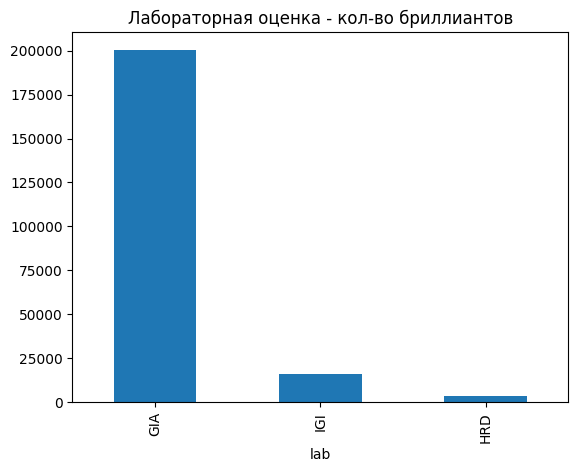

In [42]:
count_of_diamonds = diamonds['lab'].value_counts()
count_of_diamonds.plot(kind='bar', title='Лабораторная оценка - кол-во бриллиантов')

(2 балла) Постройте график `вес бриллианта - стоимость`:

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

<Axes: xlabel='cut_quality'>

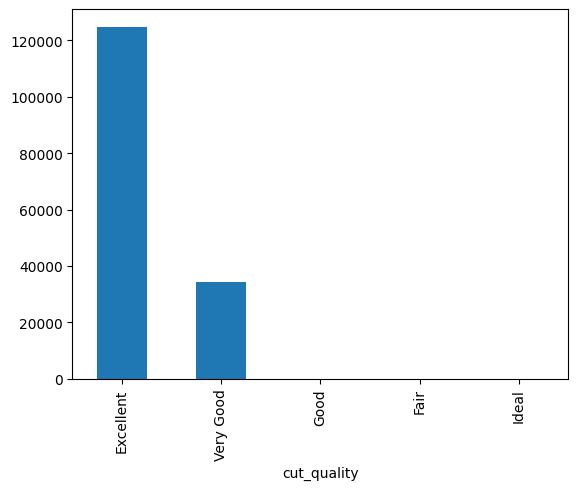

In [50]:
count_of_diamonds = diamonds['cut_quality'].value_counts()
count_of_diamonds.drop(labels=['unknown']).plot(kind='bar')


(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [51]:
new_data = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
new_data.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [52]:
new_data = new_data.sample(frac=1).reset_index(drop=True)
new_data

,meas_length,meas_width,meas_depth,total_sales_price
0,4.44,4.47,2.78,1190
1,4.28,4.30,2.65,1026
2,8.80,5.36,3.16,5688
3,4.57,4.60,2.86,1148
4,4.59,4.61,2.75,1110
...,...,...,...,...
219698,4.26,4.29,2.67,786
219699,3.70,3.72,2.19,594
219700,10.42,7.15,4.15,29909
219701,5.59,5.66,3.54,4436


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [ ]:
# your code here

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
# your code here

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

In [ ]:
# your code here

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

In [ ]:
# your code here

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
# your code here

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)